In [1]:
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

In [2]:
cmonge_to_chem_drugs = {
    "alendronate_sodium_trihydrate": "Alendronate",
    "alvespimycin_hcl": "Alvespimycin",
    "anacardic_acid": "Anacardic",
    "aurora_a_inhibitor_i": "Aurora",
    "az_960": "AZ",
    "bisindolylmaleimide_ix": "Bisindolylmaleimide", 
    "cyclocytidine_hcl": "Cyclocytidine",
    "divalproex_sodium": "Divalproex",
    "ellagic_acid": "Ellagic",
#     "enmd_2076_l__tartaric_acid": "ENMD-2076",
#     "enmd_2076": "ENMD-2076",
    "epothilone_a": "Epothilone",
    "fasudil_hcl": "Fasudil",
    "flavopiridol_hcl": "Flavopiridol", 
    "glesatinib?": "Glesatinib?(MGCD265)",
    "gsk_j1": "GSK",
    "gsk_lsd1_2hcl": "GSK-LSD1",
    "_jq1": "JQ1",
    "lapatinib_ditosylate": "Lapatinib",
    "motesanib_diphosphate": "Motesanib", 
    "nvp_bsk805_2hcl": "NVP-BSK805",
    "obatoclax_mesylate": "Obatoclax",
    "quisinostat_2hcl": "Quisinostat",
    "rucaparib_phosphate": "Rucaparib",
    "sgi_1776_free_base": "SGI-1776",
    "sodium_phenylbutyrate": "Sodium",
    "sorafenib_tosylate": "Sorafenib",
    "srt1720_hcl": "SRT1720",
    "srt3025_hcl": "SRT3025",
    "tie2_kinase_inhibitor": "Tie2",
    "tofacitinib_citrate": "Tofacitinib",
    "toremifene_citrate": "Toremifene", 
    "tranylcypromine_hcl": "Tranylcypromine",
    "triamcinolone_acetonide": "Triamcinolone",
    "trichostatin_a": "Trichostatin",
    "tubastatin_a_hcl": "Tubastatin",
    "valproic_acid_sodium_salt": "Valproic",
    "zm_447439": "ZM", 
    }
chem_to_cmonge_drugs = {v: k for k, v in cmonge_to_chem_drugs.items()}

In [3]:
default_colors = {
    "indigo": "#332288",
    "cyan": "#88CCEE",
    "teal": "#44AA99",
    "green": "#117733",
    "olive": "#999933",
    "sand": "#DDCC77",
    "rose": "#CC6677",
    "wine": "#882255",
    "purple": "#AA4499",
    "grey": "#DDDDDD",
}

model_color_dict = {
    "CMonge-RDkit-OOD": default_colors["teal"],
    "chemCPA": default_colors["green"],
}

# chemCPA

In [4]:
with open("/Users/adr/Box/otperturb/alice_exp/chemCPA/chemCPA_on_cmonge_sciplex/5perc_ood/cmonge_eval_drugdose.yaml") as f:
    logs = yaml.safe_load(f)

In [5]:
all_res = []
for drugdose in logs.keys():
    res = logs[drugdose]["mean_statistics"]
    res = pd.DataFrame.from_dict(res, orient="index").T
    res["drugdose"] = drugdose
    all_res.append(res)
big_chemcpa_res = pd.concat(all_res).reset_index()
big_chemcpa_res[["drug", "dose"]] = [c.split("_") for c in big_chemcpa_res['drugdose']]
big_chemcpa_res["dose"] = (big_chemcpa_res["dose"].astype(float) * 10000).astype(int).astype(str)
big_chemcpa_res["n_cond"] = 712
big_chemcpa_res["model_size"] = "1.4B"
big_chemcpa_res["eval_setting"] = "chemCPA"

# CMonge - RDkit

In [6]:
# all_mean_metrics = []

# for embedding in ["rdkit"]:
#     res_files = [str(f.absolute()) for f in pathlib.Path(f"/Users/adr/Box/otperturb/alice_exp/sciplex_5perc_ood/{embedding}/").glob("*_ood/results.yaml")]
#     for file in res_files:
#         split_name = file.split("/")[-2]
#         print(embedding, split_name)
#         with open(file) as stream:
#             logs = yaml.safe_load(stream)
        
#         mean_stats = {k: v["mean_statistics"] for k, v in logs["experiments"][0]["valid-set"].items()}
#         mean_stats = pd.DataFrame(mean_stats).T
       
#         mean_stats["eval_setting"] = "CMonge-DrugDose-OOD"
#         mean_stats["embedding"] = embedding
#         mean_stats["split_name"] = split_name
#         all_mean_metrics.append(mean_stats)
# big_res = pd.concat(all_mean_metrics)
# big_res[["drug", "dose"]] = [i.split("-") for i in big_res.index]
# big_res.loc[(big_res["eval_setting"]=="CMonge-DrugDose-OOD")&(big_res["embedding"]=="rdkit"), "eval_setting"] = "CMonge-RDkit-OOD"
# # big_res.loc[(big_res["eval_setting"]=="CMonge-DrugDose-OOD")&(big_res["embedding"]=="moa"), "eval_setting"] = "CMonge-MoA-OOD"
# big_res["n_cond"] = 712
# big_res["model_size"] = "600K"

In [9]:
big_res = pd.read_csv("/Users/adr/Box/otperturb/alice_exp/sciplex_5perc_ood/all_results.csv", index_col=0)
big_res = big_res[big_res["model"] == "CMonge-DrugDose-RDkit (712 cond.)"]
big_res

,mean_wasserstein,mean_mmd,mean_sinkhorn div,mean_monge_gap,mean_drug_signature,mean_r2,model,embedding,split_name,drug,dose,n_cond,model_size
azacitidine-10,5.146400,0.012773,4.571548,14.414748,0.765853,0.925668,CMonge-DrugDose-RDkit (712 cond.),rdkit,azacitidine_ood,azacitidine,10,712,600K
azacitidine-100,5.335321,0.014362,4.761536,14.334881,0.734799,0.936945,CMonge-DrugDose-RDkit (712 cond.),rdkit,azacitidine_ood,azacitidine,100,712,600K
azacitidine-1000,5.407936,0.015797,4.833258,14.228720,1.061747,0.878318,CMonge-DrugDose-RDkit (712 cond.),rdkit,azacitidine_ood,azacitidine,1000,712,600K
azacitidine-10000,5.019732,0.016526,4.451536,13.687407,1.468808,0.638956,CMonge-DrugDose-RDkit (712 cond.),rdkit,azacitidine_ood,azacitidine,10000,712,600K
iox2-10,5.215939,0.020305,4.652828,13.914027,1.888749,0.534370,CMonge-DrugDose-RDkit (712 cond.),rdkit,azacitidine_ood,iox2,10,712,600K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
sorafenib_tosylate-10000,3.445147,0.017632,2.912190,13.468285,0.868843,0.881775,CMonge-DrugDose-RDkit (712 cond.),rdkit,givinostat_ood,sorafenib_tosylate,10000,712,600K
srt3025_hcl-10,4.696993,0.028341,4.122612,13.613401,2.166795,0.718036,CMonge-DrugDose-RDkit (712 cond.),rdkit,givinostat_ood,srt3025_hcl,10,712,600K
srt3025_hcl-100,4.522161,0.025658,3.947493,13.597734,1.955121,0.758185,CMonge-DrugDose-RDkit (712 cond.),rdkit,givinostat_ood,srt3025_hcl,100,712,600K
srt3025_hcl-1000,4.744415,0.030323,4.171001,13.570827,2.236416,0.706113,CMonge-DrugDose-RDkit (712 cond.),rdkit,givinostat_ood,srt3025_hcl,1000,712,600K


# Comparison

In [10]:
mean_cmonge = big_res.groupby("drug").mean(numeric_only=True)
mean_chemCPA = big_chemcpa_res.groupby("drug").mean(numeric_only=True)

In [11]:
# match chemCPA condition and CMonge drug
mean_chemCPA["drug"] = mean_chemCPA.index
mean_chemCPA["drug"] = mean_chemCPA.drug.replace(to_replace=chem_to_cmonge_drugs)
mean_chemCPA["drug"] = [c.lower().replace("-", "_") for c in mean_chemCPA["drug"]]

mean_cmonge["drug"] = mean_cmonge.index
mean_cmonge.loc[mean_cmonge["drug"] == "enmd_2076_l__tartaric_acid", "drug"]="enmd_2076"
chem_drugs = set([c for c in mean_chemCPA["drug"].unique()])
cmonge_drugs = set([c for c in mean_cmonge["drug"].unique()])

mean_cmonge = mean_cmonge.reset_index("drug", drop=True)
mean_chemCPA = mean_chemCPA.reset_index("drug", drop=True)

chem_drugs.difference(cmonge_drugs)

set()

In [16]:
col_vec

0       True
1      False
2      False
3      False
4      False
       ...  
182     True
183     True
184    False
185    False
186    False
Name: mean_r2, Length: 187, dtype: bool

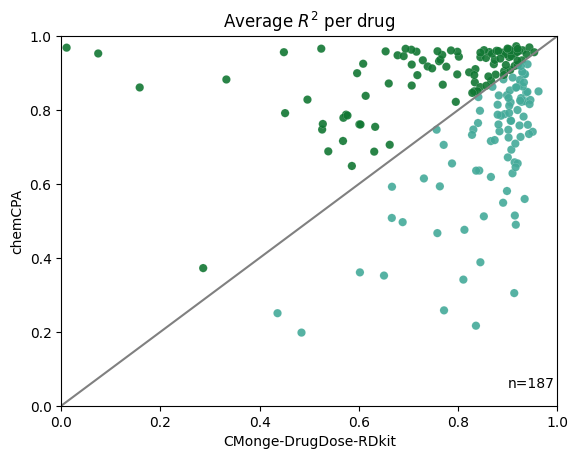

In [36]:
col_vec = mean_cmonge["mean_r2"] < mean_chemCPA["mean_r2"]

sns.scatterplot(x=mean_cmonge["mean_r2"], y=mean_chemCPA["mean_r2"], hue=col_vec,
               palette={True: model_color_dict["chemCPA"], False:model_color_dict["CMonge-RDkit-OOD"]},
                linewidth=0.1, alpha=0.9)

plt.axline(slope=1, xy1=(0.4, 0.4), color="grey")
plt.title("Average $R^2$ per drug")
plt.xlabel("CMonge-DrugDose-RDkit")
plt.ylabel("chemCPA")
plt.annotate("n=187", (0.9,0.05))
plt.xlim((0,1))
plt.ylim((0,1))
plt.legend("", frameon=False)
plt.savefig("/Users/adr/Box/otperturb/alice_exp/figures/sciplex_large_drugdose_RDkit_vs_chemCPA_R2.pdf", bbox_inches="tight")

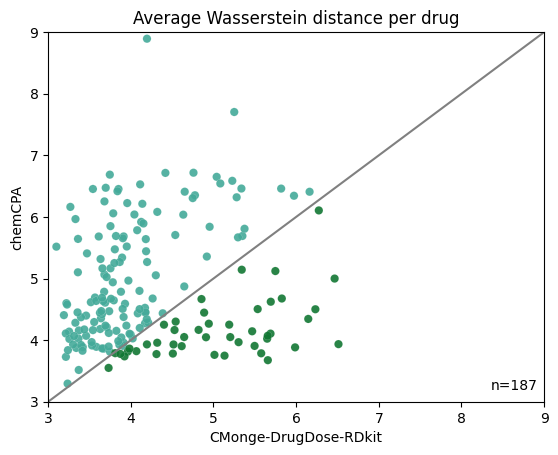

In [33]:
col_vec = mean_cmonge["mean_wasserstein"] > mean_chemCPA["mean_wasserstein"]

sns.scatterplot(x=mean_cmonge["mean_wasserstein"], y=mean_chemCPA["mean_wasserstein"], hue=col_vec,
               palette={True: model_color_dict["chemCPA"], False:model_color_dict["CMonge-RDkit-OOD"]},
                linewidth=0.1, alpha=0.9)
plt.axline(slope=1, xy1=(4, 4), color="grey")
plt.title("Average Wasserstein distance per drug")
plt.xlabel("CMonge-DrugDose-RDkit")
plt.ylabel("chemCPA")
plt.annotate("n=187", (8.35,3.2))
plt.xlim((3,9))
plt.ylim((3,9))
plt.legend("", frameon=False)
plt.savefig("/Users/adr/Box/otperturb/alice_exp/figures/sciplex_large_drugdose_RDkit_vs_chemCPA_EMD.pdf", bbox_inches="tight")

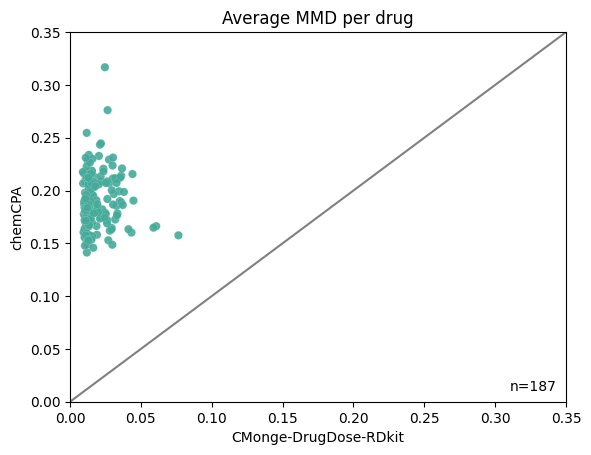

In [37]:
col_vec = mean_cmonge["mean_mmd"] > mean_chemCPA["mean_mmd"]

sns.scatterplot(x=mean_cmonge["mean_mmd"], y=mean_chemCPA["mean_mmd"], hue=col_vec,
               palette={True: model_color_dict["chemCPA"], False:model_color_dict["CMonge-RDkit-OOD"]},
                linewidth=0.1, alpha=0.9)

plt.axline(slope=1, xy1=(0.4, 0.4), color="grey")
plt.title("Average MMD per drug")
plt.xlabel("CMonge-DrugDose-RDkit")
plt.ylabel("chemCPA")
plt.annotate("n=187", (0.31,0.01))
plt.xlim((0,0.35))
plt.ylim((0.,0.35))
plt.legend("", frameon=False)

plt.savefig("/Users/adr/Box/otperturb/alice_exp/figures/sciplex_large_drugdose_RDkit_vs_chemCPA_MMD.pdf", bbox_inches="tight")

# Figures

In [13]:
all_res = pd.concat([big_res, big_chemcpa_res])

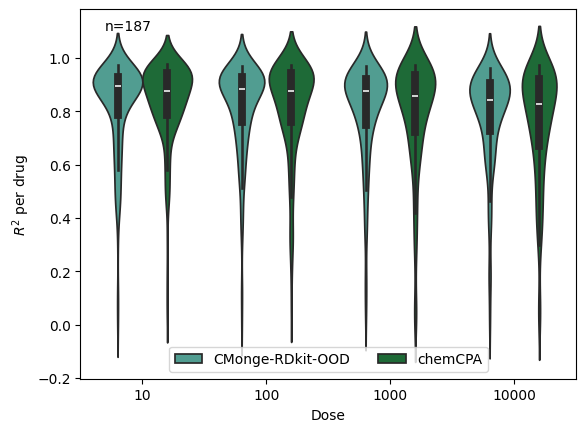

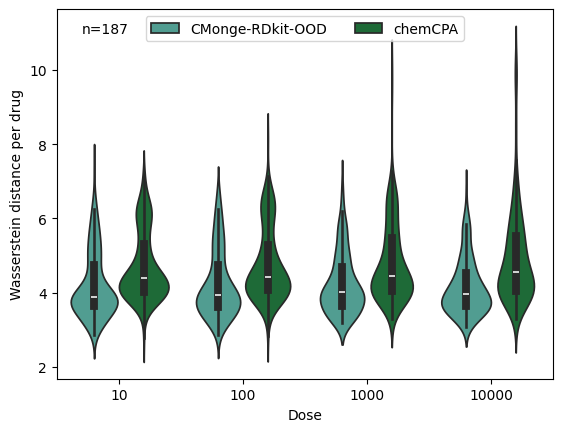

In [14]:
sns.violinplot(data=all_res, x="dose", y="mean_r2", hue="eval_setting", palette=model_color_dict)
plt.xlabel("Dose")
plt.ylabel("$R^2$ per drug")
plt.legend(title="", ncols=2, loc="lower center")
plt.text(x=-0.3, y=1.105, s="n=187")
plt.show()

sns.violinplot(data=all_res, x="dose", y="mean_wasserstein", hue="eval_setting", palette=model_color_dict)
plt.xlabel("Dose")
plt.ylabel("Wasserstein distance per drug")
plt.legend(title="", ncols=2, loc="upper center")
plt.text(x=-0.3, y=11, s="n=187")
plt.show()

/Users/adr/miniconda3/envs/cmonge_updated/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adr/miniconda3/envs/cmonge_updated/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adr/miniconda3/envs/cmonge_updated/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adr/miniconda3/envs/cmonge_updated/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

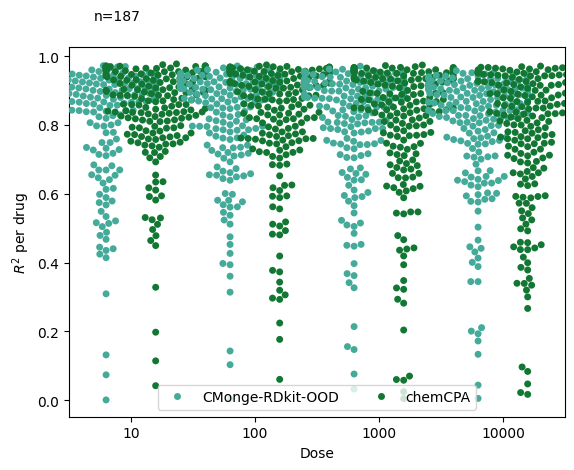

/Users/adr/miniconda3/envs/cmonge_updated/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adr/miniconda3/envs/cmonge_updated/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adr/miniconda3/envs/cmonge_updated/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adr/miniconda3/envs/cmonge_updated/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

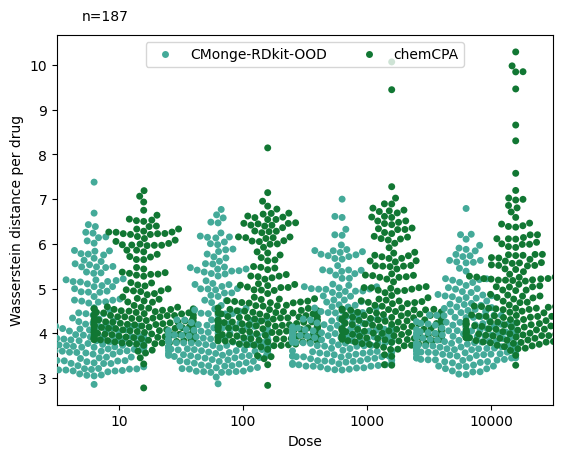

In [15]:
sns.swarmplot(data=all_res, x="dose", y="mean_r2", hue="eval_setting", palette=model_color_dict, dodge=0.9)
plt.xlabel("Dose")
plt.ylabel("$R^2$ per drug")
plt.legend(title="", ncols=2, loc="lower center")
plt.text(x=-0.3, y=1.105, s="n=187")
plt.show()

sns.swarmplot(data=all_res, x="dose", y="mean_wasserstein", hue="eval_setting", palette=model_color_dict, dodge=0.6)
plt.xlabel("Dose")
plt.ylabel("Wasserstein distance per drug")
plt.legend(title="", ncols=2, loc="upper center")
plt.text(x=-0.3, y=11, s="n=187")
plt.show()

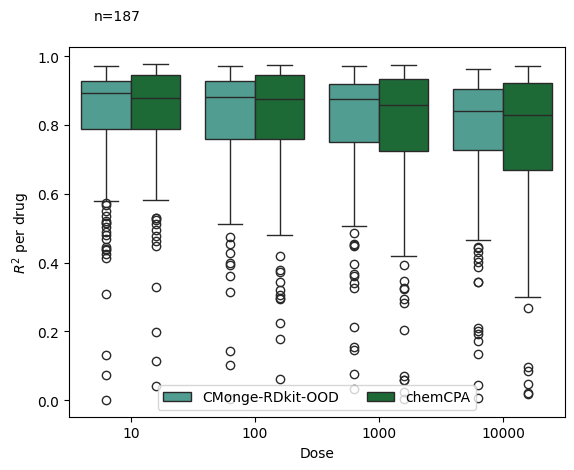

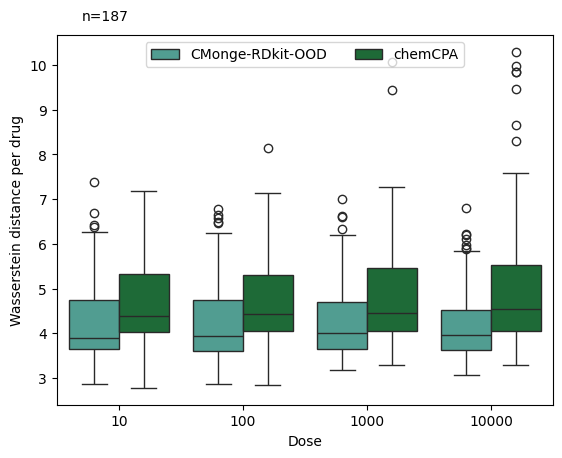

In [16]:
sns.boxplot(data=all_res, x="dose", y="mean_r2", hue="eval_setting", palette=model_color_dict)
plt.xlabel("Dose")
plt.ylabel("$R^2$ per drug")
plt.legend(title="", ncols=2, loc="lower center")
plt.text(x=-0.3, y=1.105, s="n=187")
plt.show()

sns.boxplot(data=all_res, x="dose", y="mean_wasserstein", hue="eval_setting", palette=model_color_dict)
plt.xlabel("Dose")
plt.ylabel("Wasserstein distance per drug")
plt.legend(title="", ncols=2, loc="upper center")
plt.text(x=-0.3, y=11, s="n=187")
plt.show()

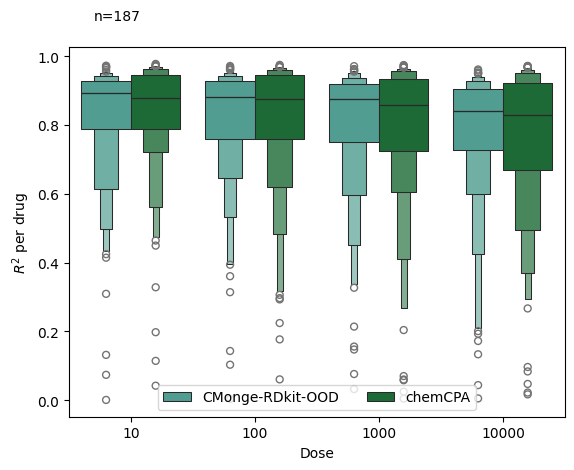

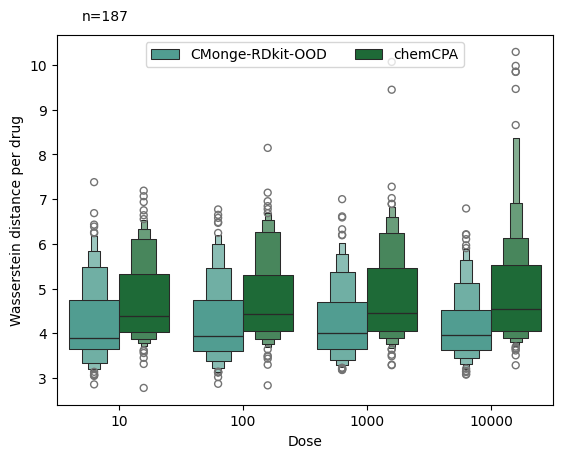

In [17]:
sns.boxenplot(data=all_res, x="dose", y="mean_r2", hue="eval_setting", palette=model_color_dict)
plt.xlabel("Dose")
plt.ylabel("$R^2$ per drug")
plt.legend(title="", ncols=2, loc="lower center")
plt.text(x=-0.3, y=1.105, s="n=187")
plt.show()

sns.boxenplot(data=all_res, x="dose", y="mean_wasserstein", hue="eval_setting", palette=model_color_dict)
plt.xlabel("Dose")
plt.ylabel("Wasserstein distance per drug")
plt.legend(title="", ncols=2, loc="upper center")
plt.text(x=-0.3, y=11, s="n=187")
plt.show()